# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

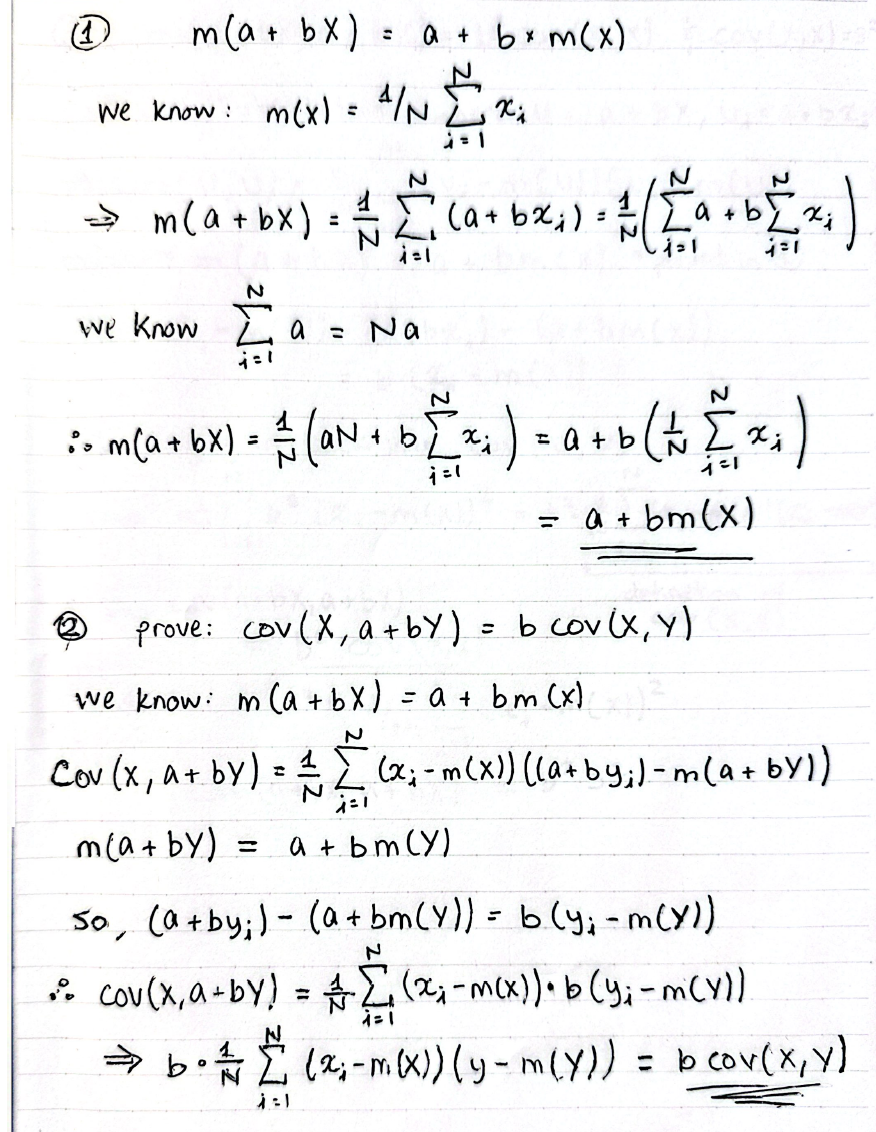

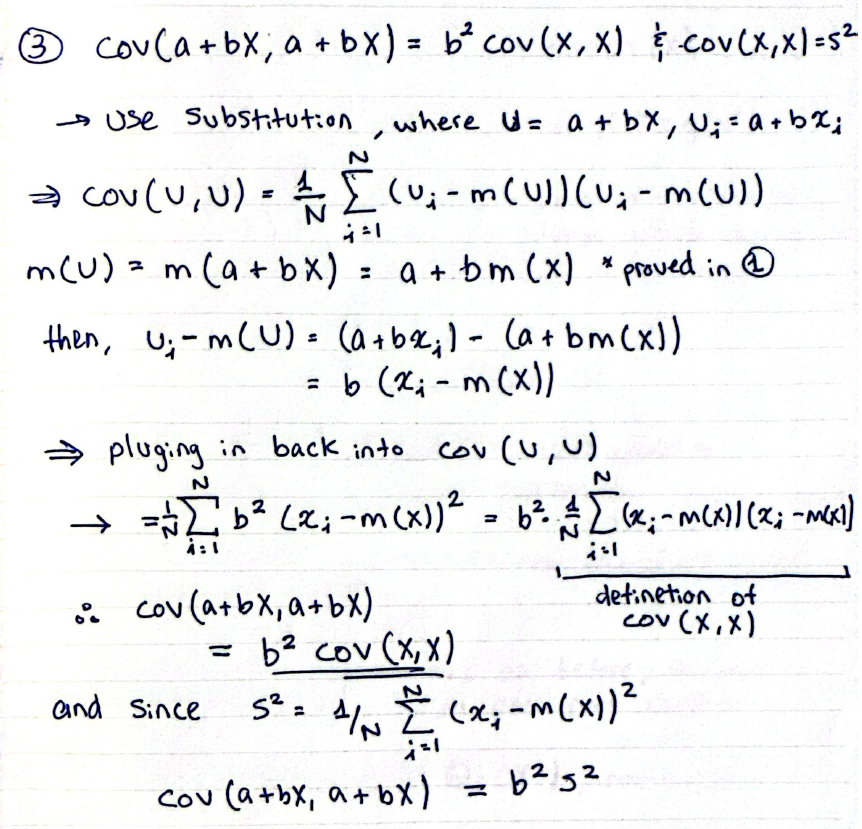

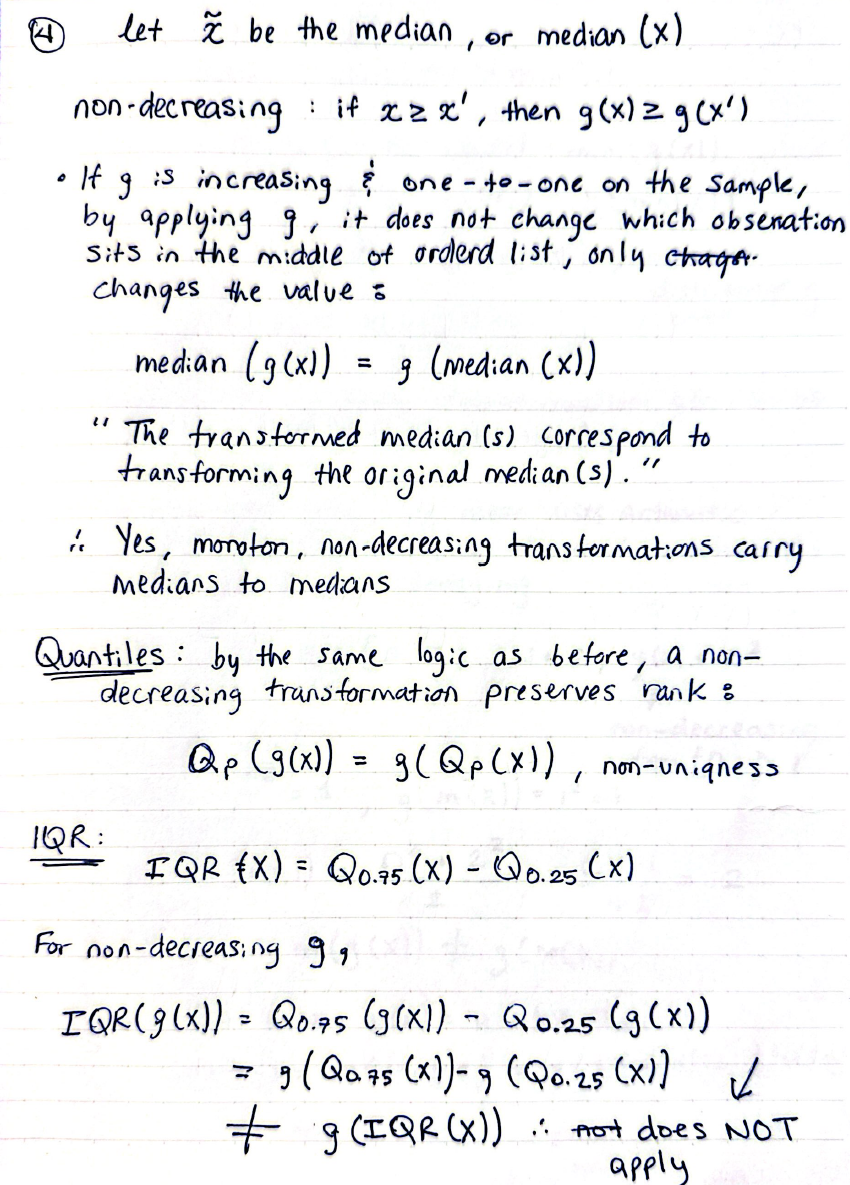

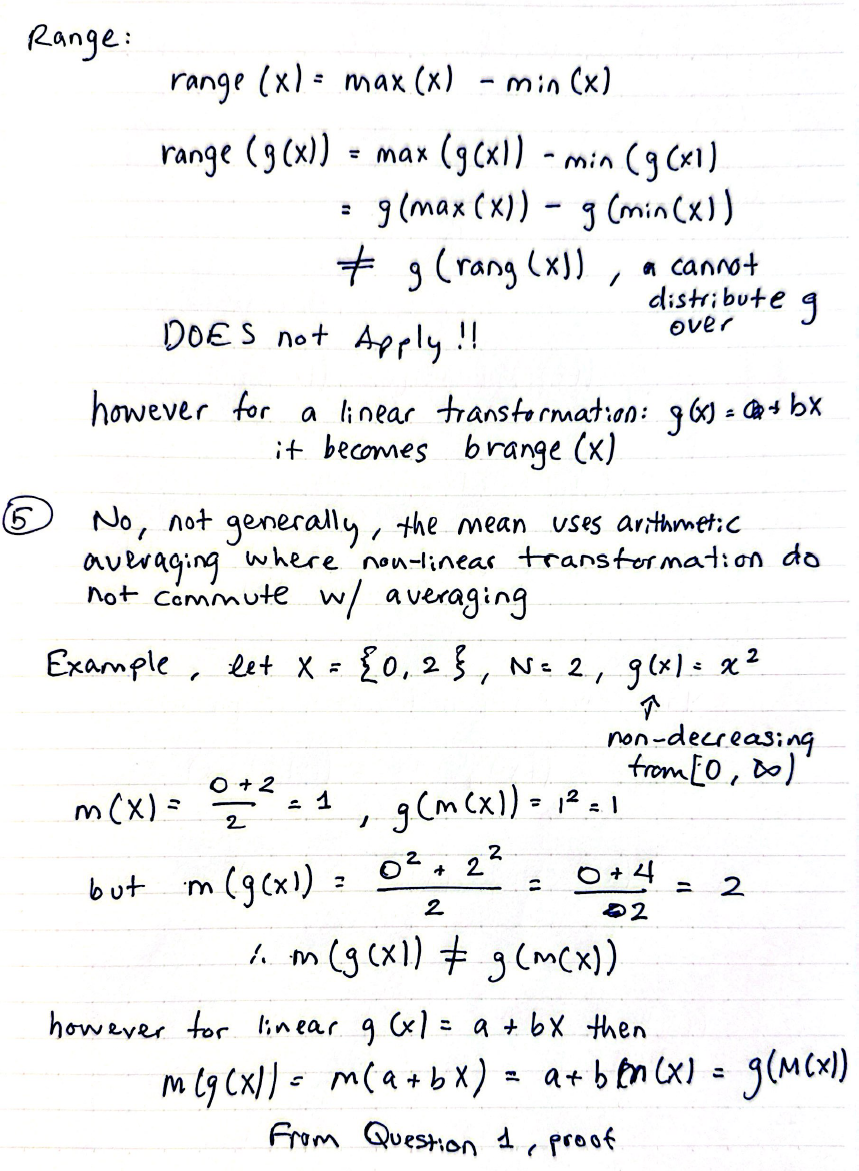 

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

In [110]:
import pandas as pd 

#Part 1: Load the Data

data = pd.read_csv("data\ForeignGifts_edu.csv")

print(data.describe)

<bound method NDFrame.describe of           ID    OPEID                     Institution Name          City  \
0          1   102000        Jacksonville State University  Jacksonville   
1          2   104700                      Troy University          Troy   
2          3   105100                University of Alabama    Tuscaloosa   
3          4   105100                University of Alabama    Tuscaloosa   
4          5   105100                University of Alabama    Tuscaloosa   
...      ...      ...                                  ...           ...   
28216  28217  4279700  Albert Einstein College of Medicine         Bronx   
28217  28218  4279700  Albert Einstein College of Medicine         Bronx   
28218  28219  4279700  Albert Einstein College of Medicine         Bronx   
28219  28220  4279700  Albert Einstein College of Medicine         Bronx   
28220  28221  4279700  Albert Einstein College of Medicine         Bronx   

      State  Foreign Gift Received Date  Foreign Gift

<>:5: SyntaxWarning: invalid escape sequence '\F'
<>:5: SyntaxWarning: invalid escape sequence '\F'
C:\Users\oaakb\AppData\Local\Temp\ipykernel_111584\3649808706.py:5: SyntaxWarning: invalid escape sequence '\F'
  data = pd.read_csv("data\ForeignGifts_edu.csv")


[ 250000  463657 3649107 ... 1064580  737375 1024469] 

dtype: int64 

missing: 0 



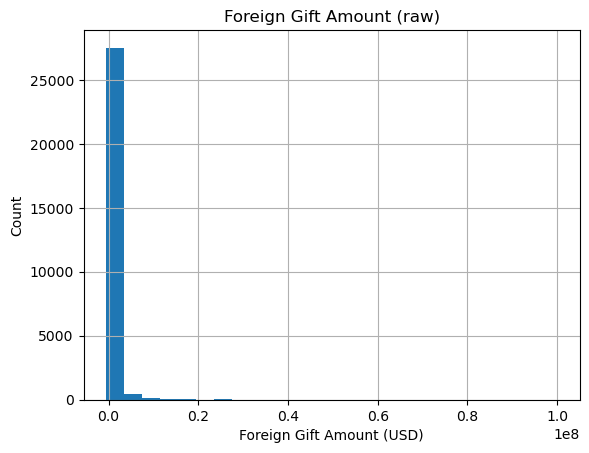

In [115]:
#Part 2: Explore the 'Foreign Gift Amount' Variable

import matplotlib.pyplot as plt

FGA = data['Foreign Gift Amount'].copy()
print(FGA.unique(), '\n')
print("dtype:", FGA.dtype, '\n')
print("missing:", FGA.isna().sum(), '\n')

FGA.hist(bins=25)
plt.xlabel("Foreign Gift Amount (USD)")
plt.ylabel("Count")
plt.title("Foreign Gift Amount (raw)")
plt.show()

Question 2 Response:

The raw distribution of 'Foreign Gift Amount' is extremely right-skewed. Most observations cluster at low dollar amounts, while a small number of gifts are exceptionally large (on the order of tens of millions), stretching the x-axis and compressing the bulk of the data near zero. This suggests the mean will be much larger than the median and motivates looking at a transformed scale (like log). 

['Monetary Gift' 'Contract' 'Real Estate'] 

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: count, dtype: float64


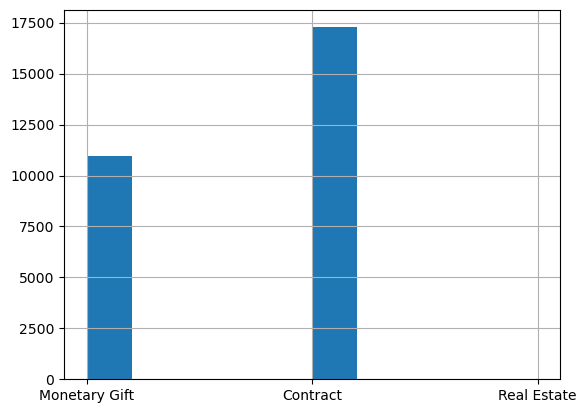

In [116]:
#Part 3: Explore the 'Gift Type' Variable

GT = data['Gift Type'].copy()

print(GT.unique(), '\n')
print(GT.value_counts(), '\n')
print(GT.hist(), '\n')

counts = GT.value_counts()
props = counts / counts.sum()
print(props)


Question 3 Response:

'Gift Type' has three categories: Contract, Monetary Gift, and REal Estate. Contracts make up the majority of reacords (~61.2%) followed by monetary gifts (~38.8%). Real estate gifts are extremely rate (~0.04%).

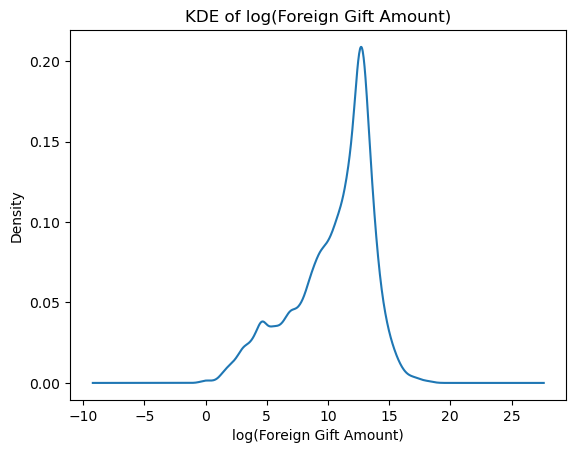

c:\Users\oaakb\anaconda3\envs\DataSci\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


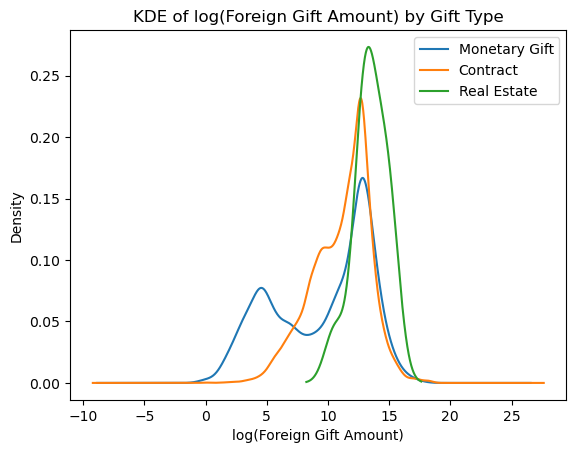

In [117]:
#Part 4: Log-transform the 'Foreign Gift Amount' Variable

import numpy as np

FGA = data["Foreign Gift Amount"].dropna()
FGA = FGA[FGA > 0]  # make sure that all values are positive for log transformation

FGA_log = np.log(FGA)

plt.figure()
FGA_log.plot(kind="kde")
plt.xlabel("log(Foreign Gift Amount)")
plt.title("KDE of log(Foreign Gift Amount)")
plt.show()

FGA_cond = data["Foreign Gift Amount"]
gtype  = data["Gift Type"]

plt.figure()

for t in gtype.unique():
    np.log(FGA_cond[gtype == t]).plot(kind="kde", label=t)

plt.xlabel("log(Foreign Gift Amount)")
plt.title("KDE of log(Foreign Gift Amount) by Gift Type")
plt.legend()


Response for Question 4:

For the KDE of log(Foreign Gift Amount), it shows a clear central peak (roughly in the 12-14 range on the log scale) with a left tail and a thinner right tail, indicating that most gifts cluster around a typical scale once log-transofrmed. When conditiong on gift type, the distribution differ. Real estate gifts are shifted to the right (larger typical amounts), contracts are concentrated near the mean peak, and the monetary gifts are more dispersed with an additional bump at lower log amounts, suggesting more smaller monetary gifts compared ot the other types. 

In [118]:
#Part 5: Explore the 'Country of Giftor' Variable

top15_count = data.groupby("Country of Giftor").size().sort_values(ascending=False).head(15)
print(top15_count, '\n')

top15_amount = data.groupby("Country of Giftor")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)
print(top15_amount, '\n')

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64 

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64 



Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64 



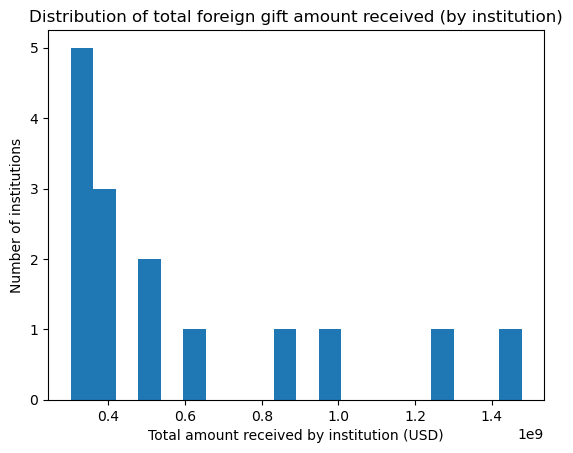

In [119]:
top15_institution = data.groupby("Institution Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)
print(top15_institution, '\n')

plt.figure()
plt.hist(top15_institution.dropna(), bins=20)
plt.xlabel("Total amount received by institution (USD)")
plt.ylabel("Number of institutions")
plt.title("Distribution of total foreign gift amount received (by institution)")
plt.show()




In [120]:
#Part 7: Giftor

Top_giftor = data.groupby("Giftor Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)
print(Top_giftor, '\n')

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64 



Response for Question 7:

The largest total giftor in the dataset is Qatar Foundation ($1.17B), followed by additional Qatar foundation-realted entries and several other major giftors.

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [121]:
#Part 1: Load the Data

data = pd.read_csv("data/airbnb_hw.csv")

print(data.columns)


Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


In [122]:
#Part 2: Dimensions of data

# dimensions (rows, columns)
print("dimensions (rows, cols):", data.shape, '\n')
print("number of observations (rows):", data.shape[0], '\n')
print("number of variables (cols):", data.shape[1], '\n')

# variables included
print("variables:")
print(data.columns.tolist(), '\n')

# first few rows
data.head()

dimensions (rows, cols): (30478, 13) 

number of observations (rows): 30478 

number of variables (cols): 13 

variables:
['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating'] 



Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number Of Reviews Price  Review Scores Rating  
0                  1                  0   145                   NaN  
1                  1                  1    37                   NaN  
2                  1                  1    28                   NaN  
3                  1                  0   199                   NaN  
4                  1                 39   549                  96.0

In [123]:
#Part 3: Cross Tab Room type and Property type

RT = data["Room Type"].copy()
PT = data["Property Type"].copy()

print(RT.unique(), '\n')
print(PT.unique(), '\n' )

cross_tab = pd.crosstab(RT, PT)

print(cross_tab)

['Entire home/apt' 'Private room' 'Shared room'] 

['Apartment' 'House' 'Other' 'Bed & Breakfast' 'Loft' 'Condominium'
 'Townhouse' nan 'Dorm' 'Boat' 'Cabin' 'Villa' 'Bungalow' 'Camper/RV'
 'Treehouse' 'Tent' 'Hut' 'Lighthouse' 'Chalet' 'Castle'] 

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0  

Response for Question 3:

Cross-tabulating Room Type by Property type shows that apartments are by far the most common property type across all room types, and shared rooms are relatively rare compared to entire homes/apartments and private rooms. For some property types, notably houses and Bed & Breakfast, private rooms are more common that renting the entire place. For many of the remaining property categores (boats, cabins, etc.), counts are small and patterns are less stable. 

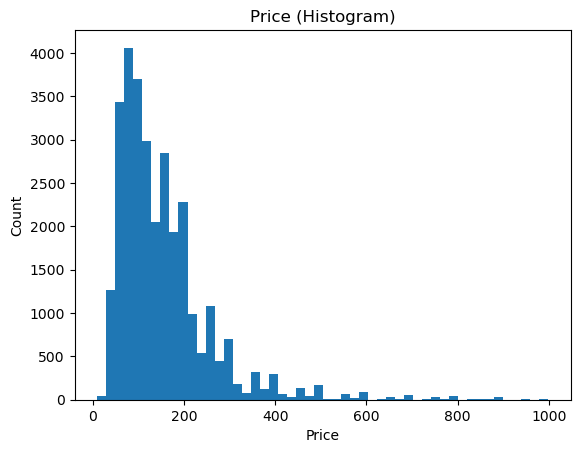

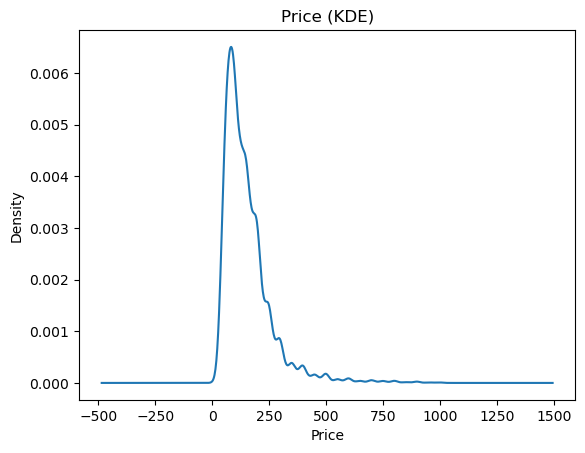

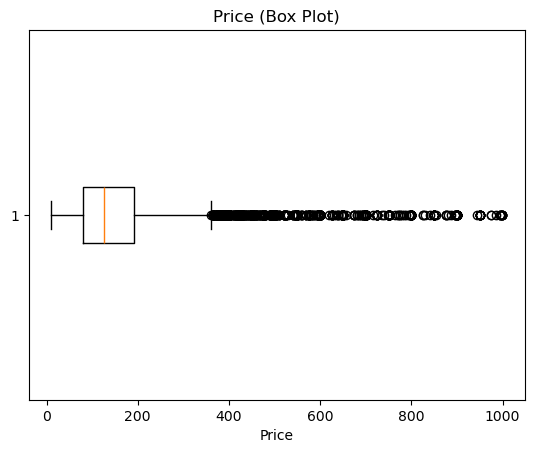

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64 



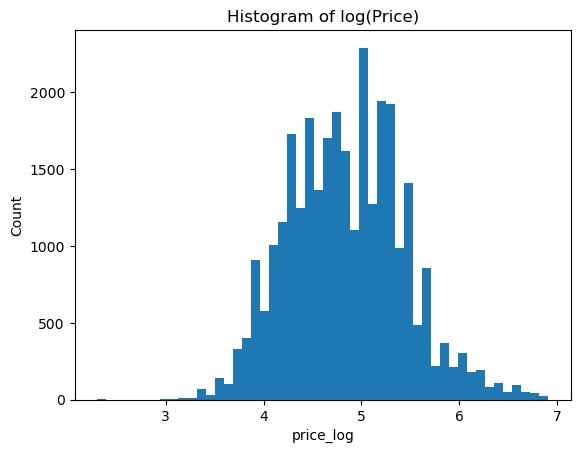

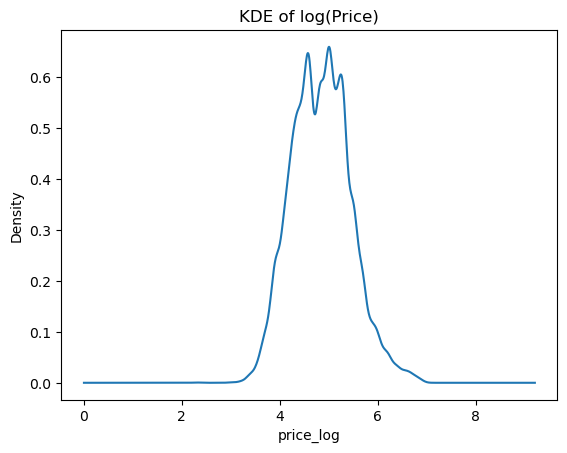

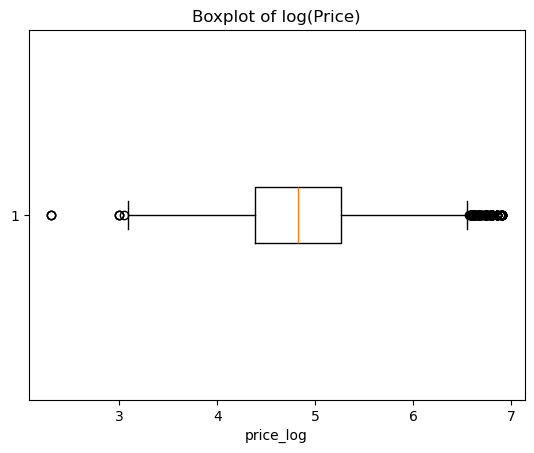

count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: price_log, dtype: float64

In [124]:
#Part 4: Price

import numpy as np
import matplotlib.pyplot as plt

data["Price"] = data["Price"].astype(str).str.strip()  # convert to numeric, coercing errors to NaN
data["Price"] = pd.to_numeric(data["Price"], errors="coerce")

price = data["Price"].dropna()

# Histogram
plt.figure()
plt.hist(price, bins=50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price (Histogram)")
plt.show()

# KDE
plt.figure()
price.plot(kind="kde")
plt.xlabel("Price")
plt.title("Price (KDE)")
plt.show()

# Box plot
plt.figure()
plt.boxplot(price, vert=False)
plt.xlabel("Price")
plt.title("Price (Box Plot)")
plt.show()

# Statistical description
print(price.describe(), '\n')   

data["price_log"] = np.log(data["Price"].where(data["Price"] > 0))

price_log = data["price_log"].dropna()

# Histogram
plt.figure()
plt.hist(price_log, bins=50)
plt.xlabel("price_log")
plt.ylabel("Count")
plt.title("Histogram of log(Price)")
plt.show()

# KDE
plt.figure()
price_log.plot(kind="kde")
plt.xlabel("price_log")
plt.title("KDE of log(Price)")
plt.show()

# Box plot
plt.figure()
plt.boxplot(price_log, vert=False)
plt.xlabel("price_log")
plt.title("Boxplot of log(Price)")
plt.show()

# Statistical description
price_log.describe()

Response for Question 4:

Price is highly right-skewed. This histogram/KDE show most listings concentrated below roughly $200-$250 with a long right tail up to $999, and the boxplot indicates many high-price outliers. Analyzing the box plot, we also see a significant number of outliers. This also appears in the summary statistics. The mean ($153.6) is noticeable larger than the media ($125), suggesting outliers inflate the mean. After transforming to log(Price), the distribution becomes much more symmetic and better scaled for analysis. The KDE/histogram look closer to bell0shaped and mean (4.845) is close to the median (4.828), indicating reduced skewness.

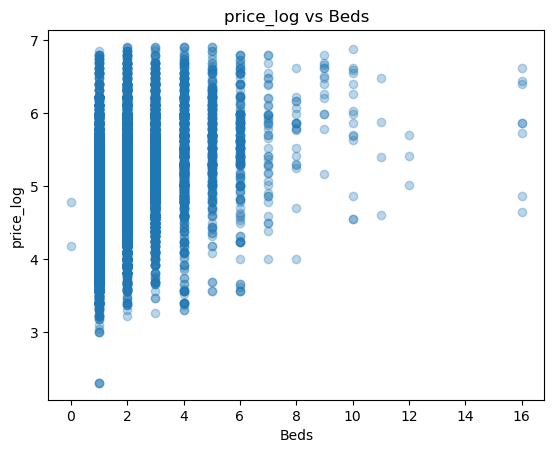

count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  400.0  650.00  975.0
11.0      4.0  332.250000  236.798613  100.0  190.00  289.5  431.75  650.0
12.0      3.0  225.000000   75.000000  150.0  187.50  225.0  262.50  300.0
16.0      8.0  402.250000  235.093143  104.0  264.25  350.0  606.25  750.0

In [125]:
#Part 5: Price vs Bed
import matplotlib.pyplot as plt

df5 = data.dropna(subset=["price_log", "Beds"])

plt.figure()
plt.scatter(df5["Beds"], df5["price_log"], alpha=0.3)
plt.xlabel("Beds")
plt.ylabel("price_log")
plt.title("price_log vs Beds")
plt.show()

beds_price_desc = data.dropna(subset=["Beds", "Price"]).groupby("Beds")["Price"].describe()

beds_price_desc


Response for question 5:

The scatterplot of price_log vs. Beds shows a positive relationship. Listings with more beds tend to have higher (log) prices. The points appear in vertical bands because bed counts are discrete, and the variability in price_log increases for larger bed counts. Grouping by Beds confirms this patters. The mean price rises steadily from about $125 (1 bed) to about $322 (5 beds), and the standard deviation increases as well, indicating more price dispersion for larger listings. At very high bed counts the mean becomes less stable because there are relatively few observations in those groups.

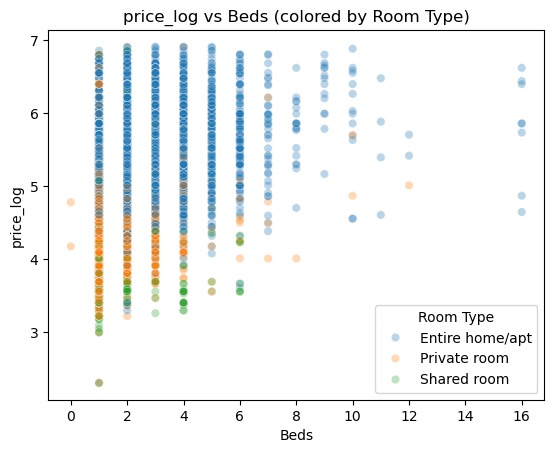

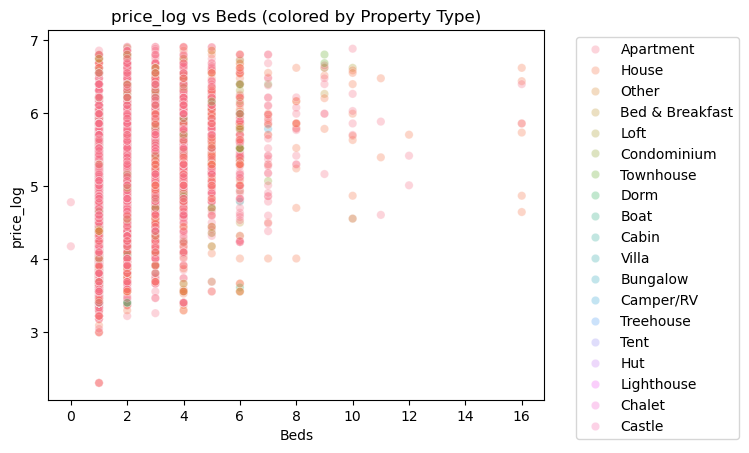

                                 count        mean  median         std
Room Type       Property Type                                         
Entire home/apt Other               10  290.800000   177.5  273.526273
                Loft               379  284.910290   220.0  184.515517
                Condominium         71  281.126761   200.0  175.313998
                Cabin                1  250.000000   250.0         NaN
                Townhouse           81  242.037037   189.0  166.755243
                House              723  234.554633   188.0  159.785974
                Villa                3  206.333333   200.0   89.667906
                Apartment        15550  200.210161   175.0  109.967435
                Bed & Breakfast     13  184.538462   130.0  119.814172
Private room    Other               28  176.642857   114.0  141.484252
Shared room     Treehouse            3  167.666667   108.0  114.788211
Entire home/apt Boat                 7  158.428571   150.0   51.110524
      

In [126]:
#Part 6: Price vs Bed, colored by Room Type and Property Type

import seaborn as sns
import matplotlib.pyplot as plt

df6 = data.dropna(subset=["price_log", "Beds", "Room Type", "Property Type"])

# Color by Room Type
plt.figure()
sns.scatterplot(data=df6, x="Beds", y="price_log", hue="Room Type", alpha=0.3)
plt.title("price_log vs Beds (colored by Room Type)")
plt.show()

# Color by Property Type
plt.figure()
sns.scatterplot(data=df6, x="Beds", y="price_log", hue="Property Type", alpha=0.3)
plt.title("price_log vs Beds (colored by Property Type)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

group_stats = data.dropna(subset=["Price", "Room Type", "Property Type"]).groupby(["Room Type", "Property Type"])["Price"].agg(count="count", mean="mean", median="median", std="std").sort_values("mean", ascending=False)
print(group_stats, '\n')

highest_mean = group_stats.sort_values("mean", ascending=False).head(1)
highest_std  = group_stats.sort_values("std", ascending=False).head(1)

print("Highest mean:")
print(highest_mean, '\n')

print("\nHighest std:")
print(highest_std)


Response for Question 6:

In the price_log vs Beds scatterplot colored by Room Type, entire home/apartment listings tend to have higher price_log than private rooms, and shared rooms are generally the lowest, across bed counts. When colored by Property Type, apartments dominate the dataset, but higher prices are concentrated among entire-home listings for property types like lofts, condominiums, and houses. Grouping Price by Room Type and Property Type shows the highest mean price is for Entire home/apt + Other (mean ~ 290.8), which also has the highest standard deviation; however this group has a small count (10). Across groups, the median appears more reliable than the mean because the mean is often noticeably larger than the median, indicating right-skew and outliers in prices.

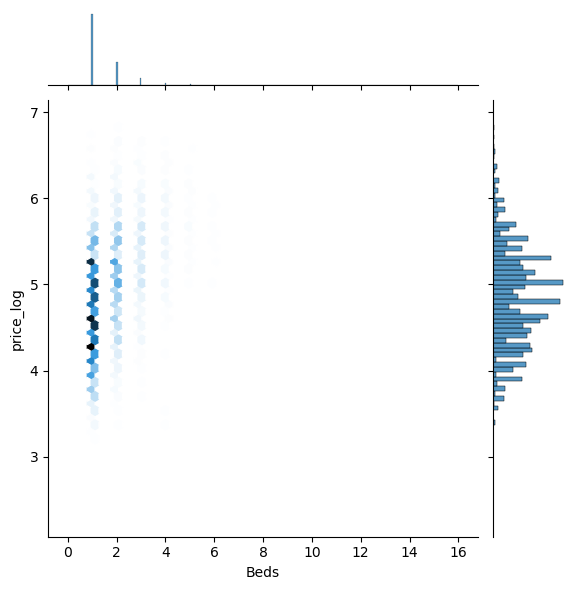

In [127]:
#Part 7: joinplot

import seaborn as sns

df7 = data.dropna(subset=["price_log", "Beds"])

sns.jointplot(data=df7, x="Beds", y="price_log", kind="hex")

Response to Question 7:

The hexbin jointplot shows that the data are heavily concentrated at 1-2 beds, with the densest values of price_log in a narrow band (roughly 4-5.5). Listings with higher bed counts are much less common. This clarifies that the ptterns seen in the scatterplots in Q5 and Q6 are primarily driven by the dense cluster of typical listings (low bed counts), and the apparent spread at larger bed counts reflects relatively sparse data. 

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [128]:
#Part 1: Load the Data

data = pd.read_csv("data\drilling_rigs.csv")

print(data.columns, '\n')
print(data.dtypes, '\n')

print("Number of variables: " + str(data.shape[1]), '\n')
print("Number of observations: " + str(data.shape[0]))

# columns that should be numeric (everything except Month)
num_cols = data.columns.drop("Month")

for c in num_cols:
    data[c] = data[c].astype(str).str.replace(",", "", regex=False).replace({"nan": None, "": None})
    data[c] = pd.to_numeric(data[c], errors="coerce")

data.dtypes




Index(['Month',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)',
       'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
       'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Active Well Service Rig Count (Number of Rigs)'],
      dtype='object') 

Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                    in

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\oaakb\AppData\Local\Temp\ipykernel_111584\822793522.py:3: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_csv("data\drilling_rigs.csv")


Month                                                                                           object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                     int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                    int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                     float64
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                   float64
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)     float64
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)    float64
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)       float64
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                       int64
Active Well Service Rig Count (Number of Rigs)                           

Response To Question 1: 

The dataset contains 623 observations and 10 variables. The Month variable is read in as an object (string), so it must be converted to an ordered datetime variable. While the onshore and offshore rig counts are already numeric (int64), several other rig-count variables (including total rigs, natural gas rigs, trajectory categories, and the active well service rig count) are read as object even though they represent numeric counts. These columns need to be coerced to numeric (by removing any commas/blank strings and using pd.to_numeric(..., errors="coerce")) so they can be plotted and differenced correctly.

In [129]:
#Part 2: Converting Month variable

data['time'] = pd.to_datetime(data['Month'], format='mixed')


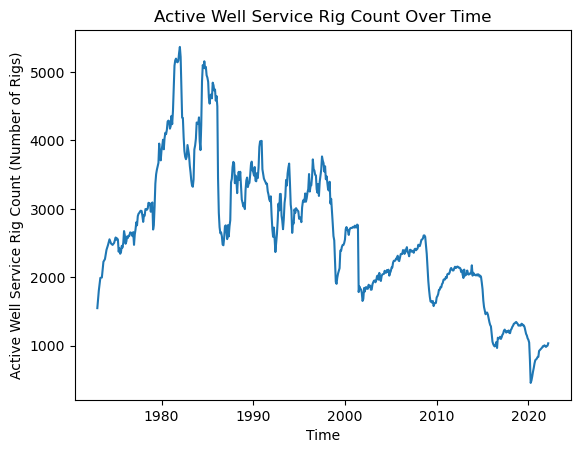

In [130]:
#Part 3: Active Well Service Rig Count Over Time

import pandas as pd
import matplotlib.pyplot as plt

data = data.sort_values("time")

col = "Active Well Service Rig Count (Number of Rigs)"

# line plot
plt.figure()
plt.plot(data["time"], data[col])
plt.xlabel("Time")
plt.ylabel("Active Well Service Rig Count (Number of Rigs)")
plt.title("Active Well Service Rig Count Over Time")
plt.show()

Response to question 3:

The active well service rig count shows large boom–bust cycles over time. It rises sharply through the 1970s and reaches its highest levels in the early 1980s (above ~5,000 rigs), followed by a steep decline in the mid-1980s. After that, the series continues to fluctuate with several smaller peaks and drops, but the overall level trends downward across the 1990s–2020s, with noticeable declines around the late 2000s and again in the mid-2010s and 2020. Overall, the pattern is highly volatile but with a long-run decline from its early-1980s peak.

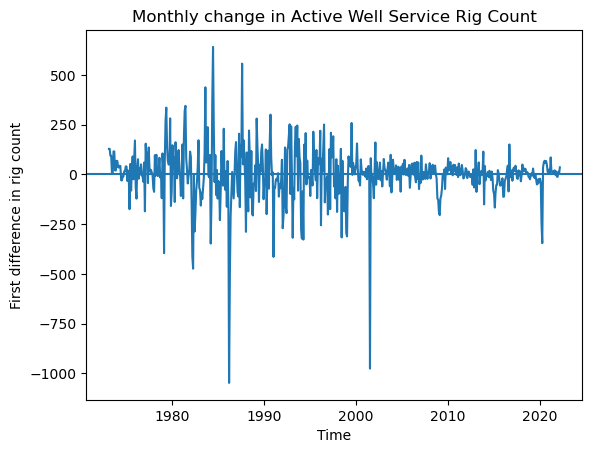

In [ ]:
#Part 4: Active Well Service Rig Count by Region

import matplotlib.pyplot as plt

col = "Active Well Service Rig Count (Number of Rigs)"

#make sure sorted by time
data = data.sort_values("time")

data["rig_diff"] = data[col].diff()

plt.figure()
plt.plot(data["time"], data["rig_diff"])
plt.axhline(0)  #zero line for reference
plt.xlabel("Time")
plt.ylabel("First difference in rig count")
plt.title("Monthly change in Active Well Service Rig Count")
plt.show()

Response to Question 4: 

The first-differenced rig count fluctuates around zero, meaning month-to-month changes are usually modest. However, there are periods of very high volatility, especially from roughly the late 1970s through the 1990s and again around the early 2000s, where the series shows frequent large positive and negative spikes. The largest movements are sharp negative shocks (drops approaching ~−1000 rigs in a month), indicating sudden contractions in rig activity. In more recent years the changes are generally smaller and more tightly clustered around zero, though there are still occasional spikes (including a noticeable drop around 2020).

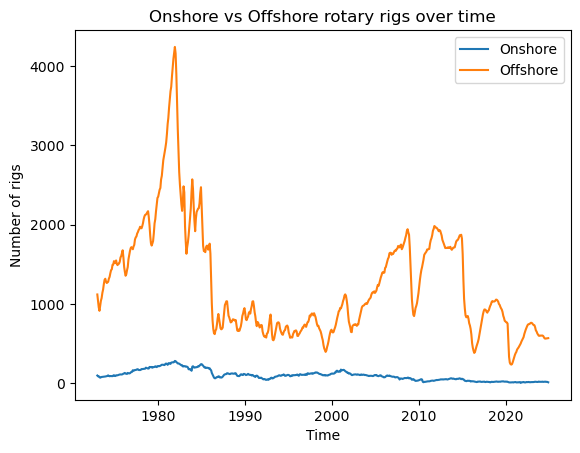

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ensure time exists and sorted
data["time"] = pd.to_datetime(data["Month"], format="mixed")
data = data.sort_values("time")

# first two columns are onshore/offshore 
cols = ["Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)"]

# melt to long format
long = data.melt(id_vars="time", value_vars=cols, var_name="Rig Type", value_name="Rig Count")

# plot
plt.figure()
for rt, grp in long.groupby("Rig Type"):
    plt.plot(grp["time"], grp["Rig Count"], label=rt)

plt.xlabel("Time")
plt.ylabel("Number of rigs")
plt.title("Onshore vs Offshore rotary rigs over time")
plt.legend(["Onshore", "Offshore"])
plt.show()